## Check if probes interfere

I filled the tank (no rotation) using the two buckets high up (no pump, only gravity). It was a bit messy. I didn't use the mixer but stirred with stick frequently. I used a little ruler to measure water depth, shelf break depth and depth of probes ANK1 and 2. I tries different configurations while taking profiles: all probes connceted, only P20 connected, only ANK1 connected, only ANK2 connected , ANK1 and ANK2 connected. Also took profiles while tank was filling.

I took water samples at bottom, surface (top), shelf break (sb), upstream probe (ups), downstream probe (dns) and measured their density.

### Specifics and notes
* 800 g salt into bucket 1
* Douw's profiler.
* Profiler has a bit too much friction during initial upcast. I need to make hook wider. 

Calibration for probes from 18 Apr 2019 (https://nbviewer.jupyter.org/urls/bitbucket.org/canyonsubc/multipleCanyons/raw/tip/lab/Conduino/Calibration/notebooks/ANK_probes_18apr19.ipynb), and for probe P20 from 30 apr 19.

### densities and depth measurements
$\rho_{bottom}= 1.02807$ g cm$^{-3}$ @ 20.016 $^{\circ}$C

$\rho_{top}= 1.00786$ g cm$^{-3}$ @ 20.025 $^{\circ}$C

$\rho_{sb}= 1.0668$ g cm$^{-3}$ @ 20.030 $^{\circ}$C

$\rho_{ups}= 1.00959$ g cm$^{-3}$ @ 20.006 $^{\circ}$C

$\rho_{dns}= 1.01052$ g cm$^{-3}$ @ 20.015 $^{\circ}$C

$H_{bottom} = 9.5$ cm

$H_{sb} = 2.5$ cm

$H_{ups} = 1.5$ cm

$H_{dns} = 1.6$ cm


### Conduino measurements
Conduino measurements

|configuration|file|
|:-------:|:--:|
|All probes| 095cm.mat|
|Only P20| 095cm_P20.mat|
|Both ANK| 095cm_ANK.mat|
|Only ANK1, no profiler| 095cm_ANK1.mat|
|Only ANK2, no profiler| 095cm_ANK2.mat|
|All probes| 095cm.mat|
|All probes while filling| 085cm.mat|
|All probes while filling| 0885cm.mat|

*I went out for lunch between 8.85 cm and 9.5 cm (1 hr 9 min difference between files)*

In [3]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [6]:
def densP(reading):
    ''' Calibration from 25 apr 19 in P20cm_probe_30apr19.ipynb. Returns density fitted using a 3rd deg polynomial.
    Input - reading::array
    Output - fitP::array of size [reading]'''
    fitP = 0.998253+(0.000019*reading)+(0.002393*reading**2)+(-0.000202*reading**3) 
    return(fitP)

def dens_ANK1(read):
    '''Calibration from 18 April 2019 in ANK_probes_18apr19.ipynb'''
    rho_1 = 0.997183+0.007756*read-0.002301*read**2+0.000710*read**3 
    return(rho_1)

def dens_ANK2(read):
    '''Calibration  from 18 April 2019 in ANK_probes_18apr19.ipynb '''
    rho_2 = 0.997496+0.006849*read-0.001366*read**2+0.001115*read**3 
    return(rho_2)

Probes ANK1 upstream and ANK2 downstream. Both near head

|Channel|Probe|
|::|::|
|'ch1':|ANK1|
|'ch2':|ANK2|
|'ch3':|P20|



### All profiles

Text(0.5,0,'time / s')

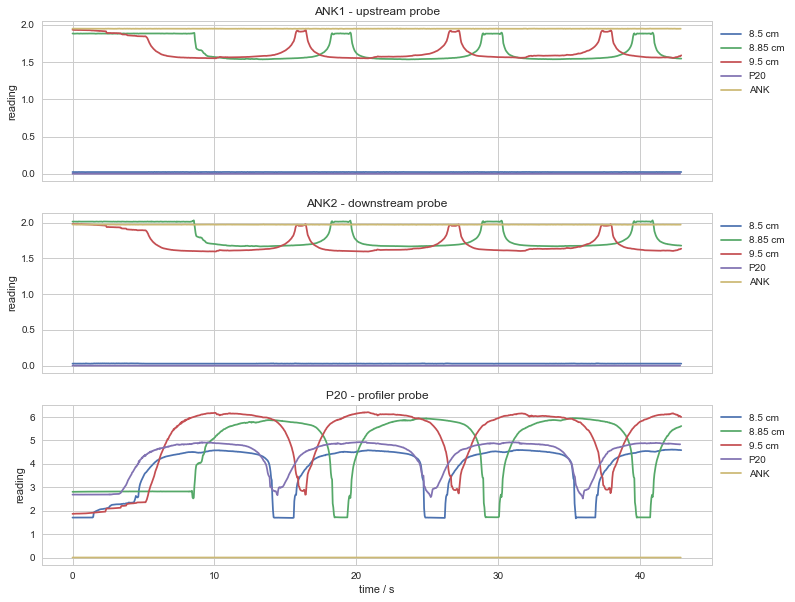

In [9]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1, figsize=(12,10), sharex=True)

labels = ['8.5 cm', '8.85 cm', '9.5 cm', 'P20', 'ANK']

filepaths = ['../check_probe_interference/085cm.mat',
             '../check_probe_interference/0885cm.mat',
             '../check_probe_interference/095cm.mat',
             '../check_probe_interference/095cm_P20.mat',
             '../check_probe_interference/095cm_ANK.mat',
             ]

for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']# dens_B(mat['ch1'])
    P2 = mat['ch2']#dens_C(mat['ch2'])
    P3 = mat['ch3']#dens_C(mat['ch2'])
    
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    ax2.plot(time,P3, label=lab)

ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))
ax2.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax2.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax2.set_title('P20 - profiler probe')
ax2.set_xlabel('time / s')

Text(0.5,0,'time / s')

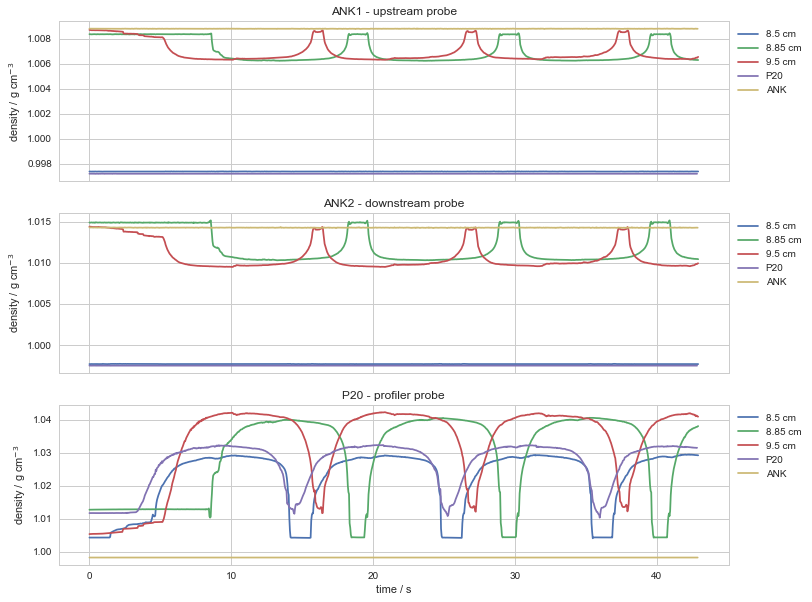

In [10]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1, figsize=(12,10), sharex=True)

labels = ['8.5 cm', '8.85 cm', '9.5 cm', 'P20', 'ANK']

filepaths = ['../check_probe_interference/085cm.mat',
             '../check_probe_interference/0885cm.mat',
             '../check_probe_interference/095cm.mat',
             '../check_probe_interference/095cm_P20.mat',
             '../check_probe_interference/095cm_ANK.mat',
             ]

for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']# dens_B(mat['ch1'])
    P2 = mat['ch2']#dens_C(mat['ch2'])
    P3 = mat['ch3']#dens_C(mat['ch2'])
    
    time = mat['time']
    ax0.plot(time,dens_ANK1(P1), label=lab)
    ax1.plot(time,dens_ANK2(P2), label=lab)
    ax2.plot(time,densP(P3), label=lab)

ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))
ax2.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('density / g cm$^{-3}$')
ax1.set_ylabel('density / g cm$^{-3}$')
ax2.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax2.set_title('P20 - profiler probe')
ax2.set_xlabel('time / s')

Mean density 095cm_ANK.mat ANK1 is 1.008811 g/cm^3
Mean density 095cm_ANK.mat ANK2 is 1.014260 g/cm^3
Mean density 95cm_ANK1.mat ANK1 is 1.008626 g/cm^3
Mean density 95cm_ANK1.mat ANK2 is 0.997502 g/cm^3
Mean density 95cm_ANK2.mat ANK1 is 0.997188 g/cm^3
Mean density 95cm_ANK2.mat ANK2 is 1.014467 g/cm^3
vs measured densities rho_ups=1.00959, rho_dns=1.01052 g cm−3


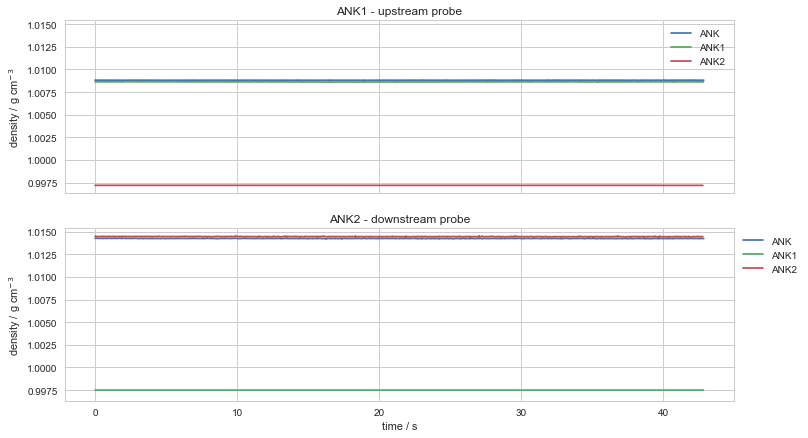

In [23]:
-


Note that the reading is not 0 when probes are not connected. I don't think canyon probes are interfering with each other or at least the interference is tiny?

In [25]:
ANK1_dif = 1.008811-1.008626 # ANK1 only - both ANK
ANK2_dif = 1.014260-1.014467 #  ANK2 only - both ANK
ANK_noise_dif = 0.997502-0.997188 # ANK1 when only ANK2 connected -  ANK2 when only ANK1 connected

print(ANK1_dif, ANK2_dif, ANK_noise_dif)

0.0001849999999998797 -0.00020700000000006824 0.00031400000000003647


These differences may also be due to the ruler I introduced at some point to measure depth. In any case, the density differnce measured when a probe is connected or when both are connected is on the 4th decimal, 10 times smaller than my measurements.

Text(0.5,0,'time / s')

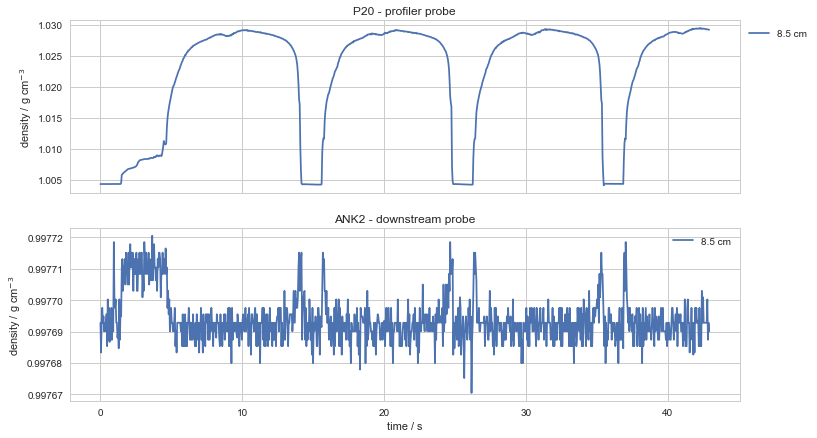

In [26]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(12,7), sharex=True)

labels = ['8.5 cm','8.85 cm']

filepaths = ['../check_probe_interference/085cm.mat',
             ]

for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P2 = mat['ch2']# dens_B(mat['ch1'])
    P3 = mat['ch3']#dens_C(mat['ch2'])
    
    time = mat['time']
    ax0.plot(time,densP(P3), label=lab)
    ax1.plot(time,dens_ANK2(P2), label=lab)
ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('density / g cm$^{-3}$')
ax1.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('P20 - profiler probe')
ax1.set_title('ANK2 - downstream probe')
ax1.set_xlabel('time / s')




The intereference between profiler porbe and canyon head probes is always there, but it grows as the reading in the canyon probes is larger. While the tank was filling and the probes had 5 mm of water above them (water level 8.5 cm) the reading in the canyons was lower and the deviations due to the profiler are small (on the 5th decimal). As the signal grew when the tank was full, the error is 100 times larger (on the 3rd decimal).

### Profiles

Text(0.5,0,'time / s')

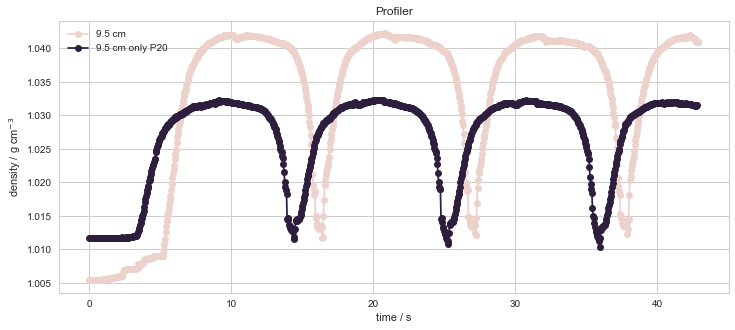

In [33]:
fig, (ax0) = plt.subplots(1,1, figsize=(12,5), sharex=True)
labels=['9.5 cm', '9.5 cm only P20']

filepaths = ['../check_probe_interference/095cm.mat',
             '../check_probe_interference/095cm_P20.mat',
             ]
sns.set_palette(sns.cubehelix_palette(len(filepaths)))
for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P3 = mat['ch3']# dens_B(mat['ch1'])
    time = mat['time']
    densP3 = densP(P3)
    ax0.plot(time,densP3,'o-', label=lab)
ax0.legend(loc=0)

ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('Profiler')
ax0.set_xlabel('time / s')


There is a huge differece between profiles if the canyon probes are connected. When I recalibrated Probe P2 today, all probes were connected and when I calibrated the bent probes P20 was not connected.